In [ ]:
#Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [ ]:
#Data import
Data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [ ]:
#Data imported successfully
Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Data reading, checking dimensions and information of the data
print(Data)

print('dimensions:')
print(Data.shape)

print('Information:')
Data.info()

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
dimensions:
(25, 2)
Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#Cheking for duplicates and missing
Data.isnull().values.any()
value = len(Data[Data.duplicated()])
print(value)

0


In [ ]:
#Statistical summary
print("Statistical Summary")
Data.describe().T

Statistical Summary


,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


<ipython-input-7-d7c4a946e01f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data['Scores'])


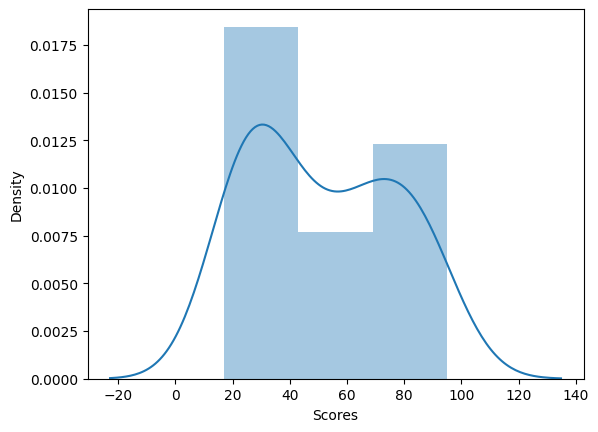

In [ ]:
#DISTRIBUTION
sns.distplot(Data['Scores'])
plt.show()

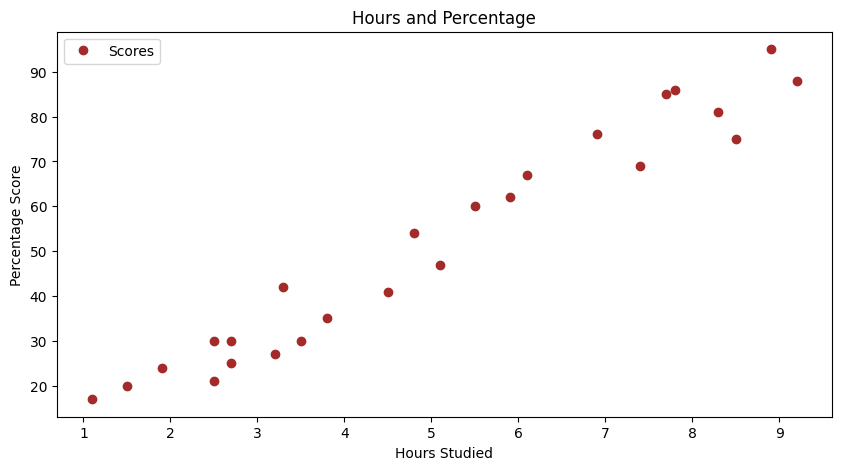

In [ ]:
#Scatterpot
Data.plot(x='Hours', y='Scores', style ='o', color = "Brown",figsize = (10,5))  
plt.title('Hours and Percentage')  
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score') 
plt.show()

# LINEAR REGRESSION

In [ ]:
#Data Preprocessing
x=Data.iloc[:,:-1].values
y=Data.iloc[:,1].values

In [ ]:
#Model Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  
reg.fit(x_train.reshape(-1,1), y_train) 

print("Training complete.")

Training complete.


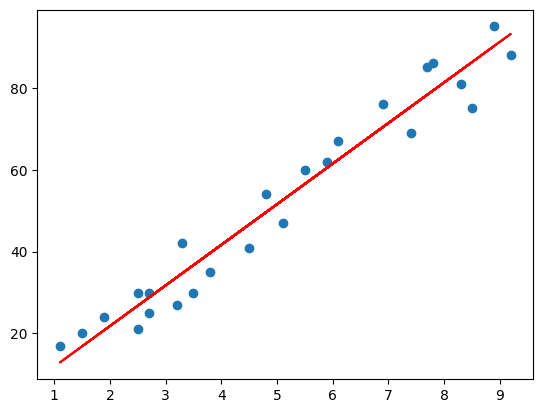

In [ ]:
#Plotting the Regression Line
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line, color = "red")
plt.show()

In [ ]:
# Testing data
print(x_test)
# Model Prediction 
y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Acuta vs Predicted
actual_predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
actual_predicted

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
#Estimating training and test score
print("Training Score:",reg.score(x_train,y_train))
print("Test Score:",reg.score(x_test,y_test))
     

Training Score: 0.9515510725211552
Test Score: 0.9454906892105354


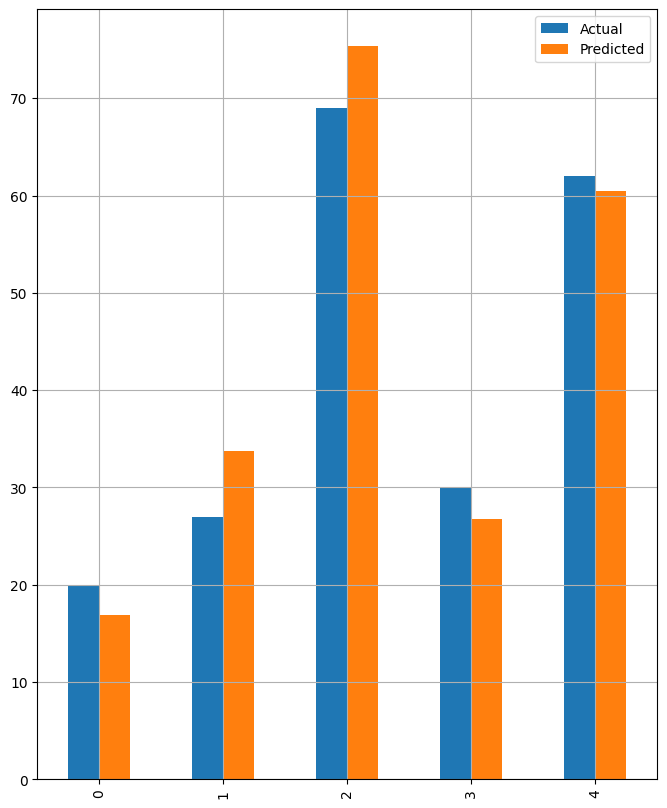

In [ ]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

actual_predicted.plot(kind='bar',figsize=(8,10))
plt.grid(which='major', linewidth='0.8')
plt.grid(which='minor', linewidth='0.8')
plt.show()

In [ ]:
y_pred=reg.predict(x_test)
df=pd.DataFrame({"Actual":y_test,"Predict":y_pred})
print(df)
print("Accuracy:",reg.score(x,y)*100)

   Actual    Predict
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033
Accuracy: 95.26947647057273


In [ ]:
hours=9
p=reg.predict([[hours]])
print(f"If a student studied for {hours} hours/day will score{p}% in exam.")

If a student studied for 9 hours/day will score[91.21406837]% in exam.


In [ ]:
#Model Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
R2 score: 0.9454906892105354


Thank You

# Task 1 **completed**

Done by :- Risika Singh